<a href="https://colab.research.google.com/github/kanacb/pythonmasterclass/blob/main/Lesson5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 5 - Data Handling

85% of Data Science projects have failed because we don't know how to handle data. This exercise, you will learn how to wrangle data like a Texan on wild Mustang. Get ready to learn some hardcore maneuvers to impress your creative abilities on how you can handle data. We begin looking at it from a statistical point of view and then begin to extarct information that is key to understand the data. Now you are ready to tame any wild mustang out there.


 <img class="center" src="https://blogs.sas.com/content/datamanagement/files/2016/09/43621333-300x255.jpg">



# Pandas, why and how it can help us?

Create a simple dataset to view the basic of statistics. Lets explore the panda. Is it black with spots or white black spots? 

In [4]:
import numpy as py
import pandas as pd
import sys                             # Read system parameters.
import os  
import matplotlib                      # Create 2D charts.
import matplotlib.pyplot as plt
data = [1,2,2,3,3,3,4,4,5]
df = pd.DataFrame(data)
df

,0
0,1
1,2
2,2
3,3
4,3
5,3
6,4
7,4
8,5


Description of data.
1. Count = number of elements in the array
2. mean = the mean value, is the average value
3. std = standard deviation
4. min = the minimum value in the array
5. 25% = 25% quartile of the values
6. 50% = 50% quartile of the values
7. 75% = 75% quartile of the values
8. max = the maximu value in the array

In [4]:
df.describe()

,0
count,9.000000
mean,3.000000
std,1.224745
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


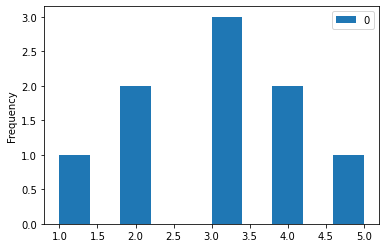

In [5]:
df.plot.hist()

mean is the average value [3.]
median is the middle value [3.]
mode is value that occurs most often [[3]]
Highest Density value 0.2736956262086172


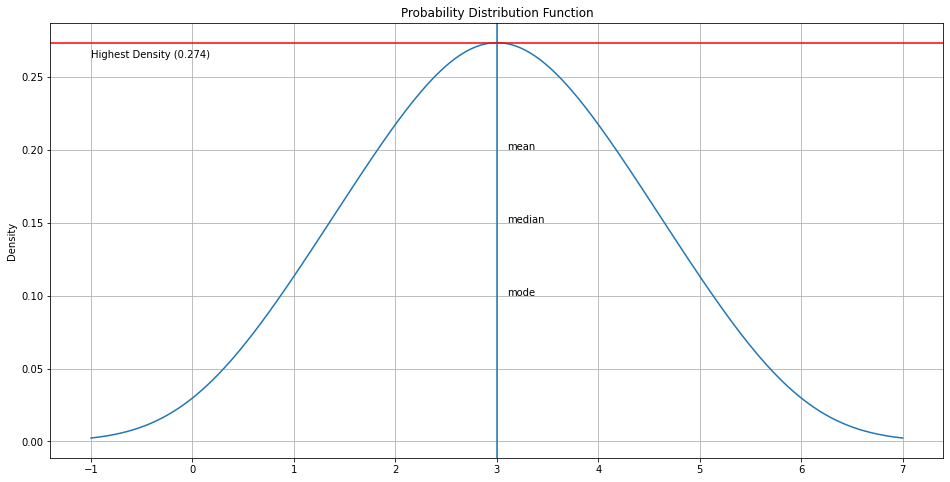

In [6]:
ax = df.plot.density(title="Probability Distribution Function",figsize=(16,8),grid=True,legend=False)
ax.axvline(x=df.describe()[0][1],label="asdf")
ax.text(3.1,0.2,"mean")
ax.text(3.1,0.15,"median")
ax.text(3.1,0.10,"mode")
data = ax.get_lines()[0].get_data()
hd = data[1].max()
ax.axhline(hd,color="red")
ax.text(-1,hd-0.01,f"Highest Density ({hd:0.3})")
#ax.fill_betweenx(1,2)
print("mean is the average value",df.mean(axis=0).values)
print("median is the middle value",df.median(axis=0).values)
print("mode is value that occurs most often",df.mode(axis=0).values)
print("Highest Density value",hd)

In [ ]:
data

> Standard Deviation






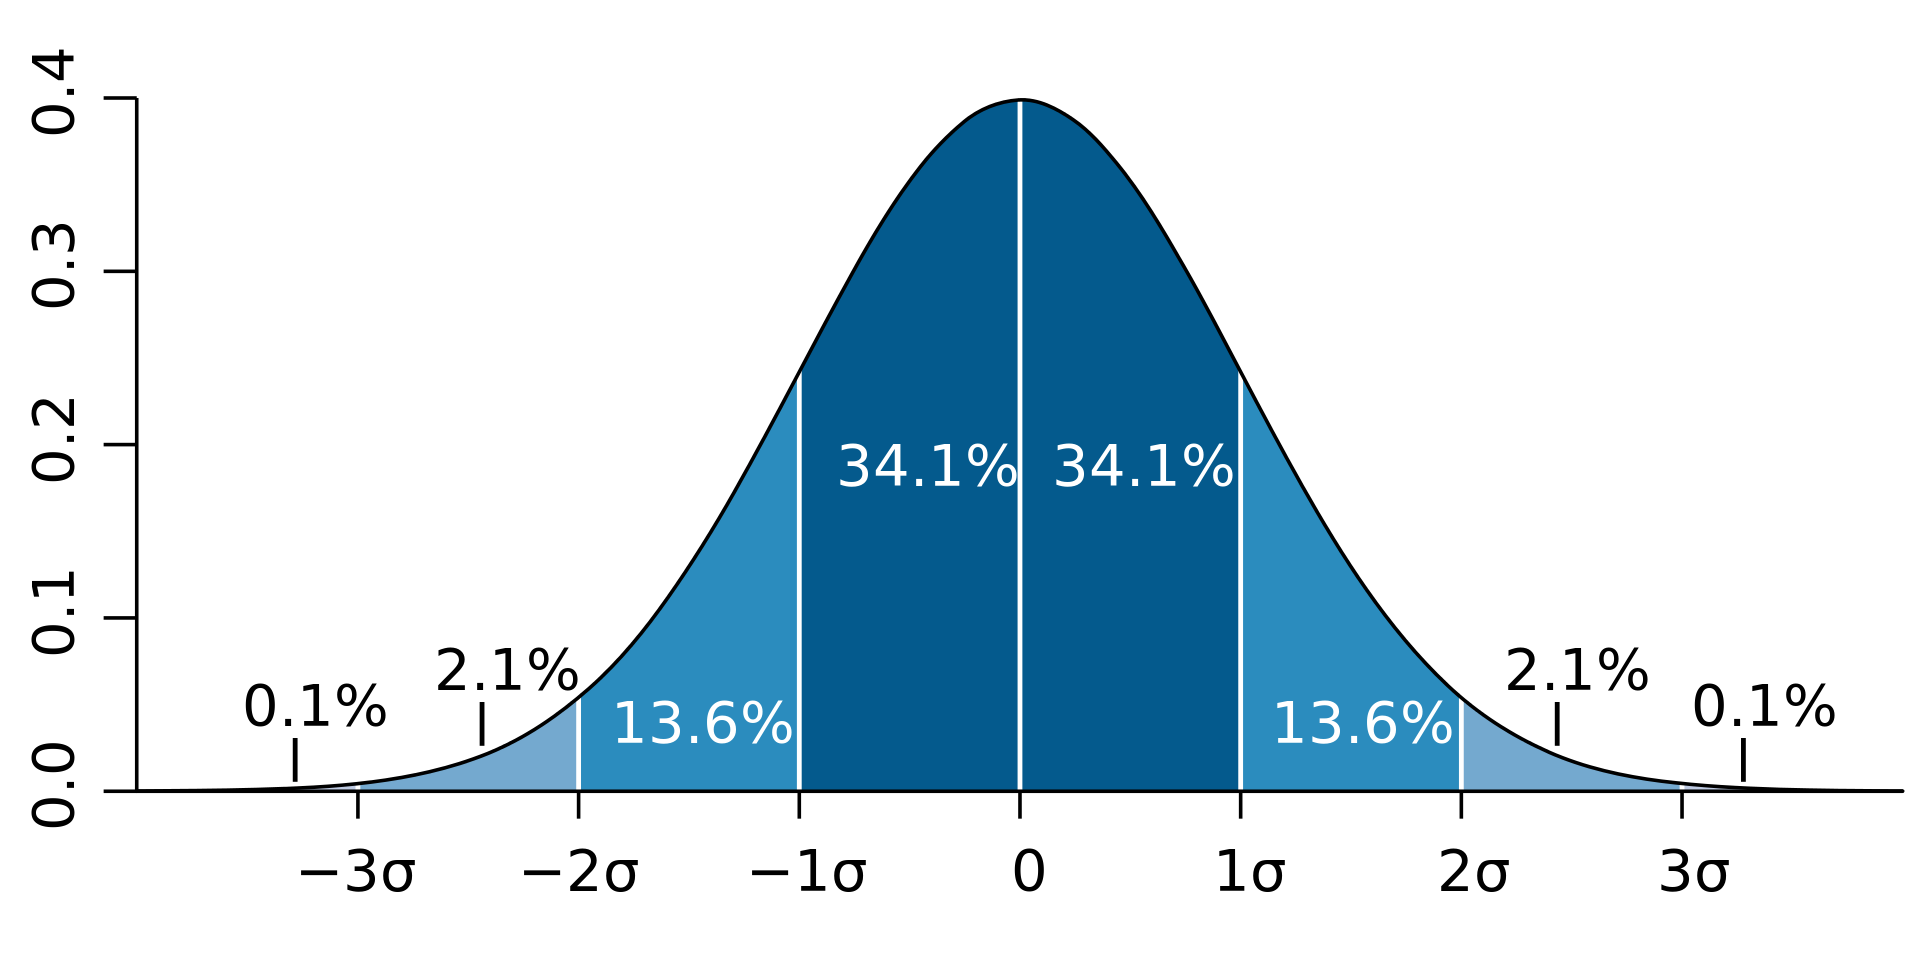

The probability density function (pdf) of the normal distribution, also called Gaussian or "bell curve", the most important continuous random distribution. As notated on the figure, the probabilities of intervals of values correspond to the area under the curve.

# Look At Real Data

Clean data is all the same but dirty data is unique.

<img src="https://cdn.britannica.com/70/205170-050-C8F46187/Titanic-survivors-lifeboats-May-15-1912.jpg">

In [10]:
PROJECT_ROOT_DIR = "/content/drive/MyDrive/Colab Notebooks/CAIP/Classification/"
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "titanic_data")
# print('Data files in this project:', os.listdir(DATA_PATH))
data_raw_file = os.path.join(DATA_PATH, 'train.csv')
data_raw = pd.read_csv('train.csv')
print('Loaded {} records from {}.'.format(len(data_raw), data_raw_file))

Loaded 891 records from /content/drive/MyDrive/Colab Notebooks/CAIP/Classification/titanic_data/train.csv.


# Get acquainted with the dataset

In [ ]:
print(data_raw.info())      # View data types and see if there are missing entries.
data_raw.head(10)           # View first 10 records.

# Examine a general summary of statistics

In [ ]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(data_raw.describe())

In [ ]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(data_raw.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))

# Use stacked bar visualization to show survival numbers

In [ ]:
feature_list = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for feature in feature_list:
    plot_set = data_raw.groupby([feature, 'Survived'])
    plot_set = plot_set.size().reset_index()
    plot_set = plot_set.pivot(columns=feature,index='Survived',values=0)
    plot_set.plot(kind='bar', stacked=True, rot=0, figsize=(20,3)).set_title(f'Survival Rates by {feature}');

# Assignments

1.   Create a new row of men and women
2.   Plot 2 graphs of Men Vs Survival and Women Vs Survival
3. Identify missing values
4. Replace missing values with the median value
5. A dataset can contain a range of values that depict a certain characteristic, such as grades on tests in a class during the semester. A specific student has so far received the following grades: 76, 81, 78,87, 75, and 72. There is one final test in the semester. What minimum grade would the student need to achieve on the last test to get an 80% average?

